In [ ]:
# ImageGenrator을 이용한 CNN 블로그
# https://tykimos.github.io/2017/03/08/CNN_Getting_Started/

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import sys
import tensorflow as tf

In [87]:
# keras에서 mnist 데이터셋 불러오기
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [11]:
import matplotlib.pyplot as plt

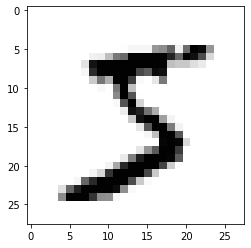

In [14]:
plt.imshow(xTrain[0], cmap='Greys')
plt.show()

In [15]:
for x in xTrain[0] :
    for i in x :
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [26]:
# shape를 None, 28*28로 바꾸기 
xTrain = xTrain.reshape(xTrain.shape[0], xTrain.shape[1]*xTrain.shape[2])
xTrain = xTrain.astype('float64')  # float32보다 더 정교한 버전
xTrain = xTrain / 255
# 한 줄로 작성
xTest = xTest.reshape(xTest.shape[0], xTest.shape[1]*xTest.shape[2]).astype('float64')/ 255

In [93]:
# label 원핫인코딩
yTrain = np_utils.to_categorical(yTrain, 10)
yTest = np_utils.to_categorical(yTest, 10)

# yTrain[0]
# array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.callbacks import ModelCheckpoint, EarlyStopping

import os

import warnings
warnings.filterwarnings('ignore')

In [69]:
# 모델 구성
model = Sequential()

model.add(Dense(512 ,activation='relu', input_dim=784))
model.add(Dense(10 ,activation='softmax'))

In [70]:
# 모델 환결 설정
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'] )

In [71]:
# Early Stopping
# 모델 최적화
modelDir = './myModel/'

# 만약 myModel 디렉토리가 존재하지 않는다면
if not os.path.exists(modelDir) :
    os.mkdir(modelDir)
    modelPath = './myModel/{epoch:02d}-{val_loss:.4f}.hdf5'

# callback함수 : keras함수에서 모델을 학습할 때 중간중간에 monitor에 정한 상황에 닥치면 자동으로 호출됨
# verbose:중간중간 진행 상황을 볼 것인가 ? / save_best_only : 모델 성능이 최고일 때만 저장하겠냐?
checkpointer = ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='val_loss', patience=10)

In [72]:
# 모델 학습
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=30, batch_size=200, callbacks=[es, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.3078 - accuracy: 0.9128 - val_loss: 0.1589 - val_accuracy: 0.9547

Epoch 00001: val_loss improved from inf to 0.15895, saving model to ./myModel/01-0.1589.hdf5
Epoch 2/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.1255 - accuracy: 0.9643 - val_loss: 0.1158 - val_accuracy: 0.9655

Epoch 00002: val_loss improved from 0.15895 to 0.11581, saving model to ./myModel/02-0.1158.hdf5
Epoch 3/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.0847 - accuracy: 0.9754 - val_loss: 0.0944 - val_accuracy: 0.9711

Epoch 00003: val_loss improved from 0.11581 to 0.09439, saving model to ./myModel/03-0.0944.hdf5
Epoch 4/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.0616 - accuracy: 0.9822 - val_loss: 0.0735 - val_accuracy: 0.9776

Epoch 00004: val_loss improved from 0.09439 to 0.07349, saving model to

In [73]:
print('테스트 정확도 %.4f'%(model.evaluate(xTest, yTest)[1]))

10000/10000 [==============================] - 1s 51us/step
테스트 정확도 0.9805


In [74]:
# 테스트셋의 오차
yVloss = history.history['val_loss']
# 학습셋의 오차
yLoss = history.history['loss']

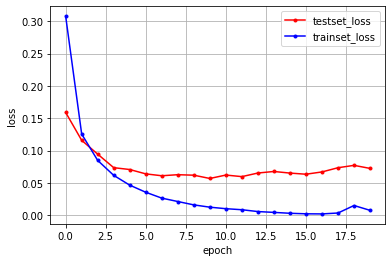

In [75]:
xLen = np.arange(len(yLoss))
plt.plot(xLen, yVloss, marker='.', c='r', label='testset_loss')
plt.plot(xLen, yLoss, marker='.', c='b', label='trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Conv2D 
: keras에서 컨볼루션 계층을 추가하는 함수

# 드랍아웃 (drop out)
오버피팅 감소
히든계층의 노드 중 일부를 선택하여 학습하는 기법
 
    : 중간중간 가중치를 제거하면서 학습데이터에 지나치게 치우쳐서 학습되는 과적합을 방지

In [80]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [89]:
# CNN으로 모델 구성
model = Sequential()

# Conv2D(필터 개수, 필터 크기, 입력값(행,열,색상), 활성화함수)
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

# MaxPooling2D(풀링사이즈, )
model.add(MaxPooling2D(pool_size=2))

# Dropout(드롭아웃비율)
model.add(Dropout(0.25))  # 25%

# Flatten() : 1차원으로 변경하는 함수
model.add(Flatten())

model.add(Dense(128 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [90]:
# 모델 환결 설정
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'] )

In [91]:
# Early Stopping
# 모델 최적화
modelDir = './myCnnModel/'

# 만약 myModel 디렉토리가 존재하지 않는다면
if not os.path.exists(modelDir) :
    os.mkdir(modelDir)
    modelPath = './myModel/{epoch:02d}-{val_loss:.4f}.hdf5'

# callback함수 : keras함수에서 모델을 학습할 때 중간중간에 monitor에 정한 상황에 닥치면 자동으로 호출됨
# verbose:중간중간 진행 상황을 볼 것인가 ? / save_best_only : 모델 성능이 최고일 때만 저장하겠냐?
checkpointer = ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='val_loss', patience=10)

In [98]:
# keras에서 mnist 데이터셋 불러오기
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

# 4차원으로 변경
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1).astype('float32')/255
xTest = xTest.reshape(xTest.shape[0],28,28,1).astype('float32')/255

# 원핫인코딩
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [99]:
# 모델 학습
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=30, batch_size=200, callbacks=[es, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2869 - accuracy: 0.9117 - val_loss: 0.0653 - val_accuracy: 0.9798

Epoch 00001: val_loss improved from inf to 0.06528, saving model to ./myModel/01-0.0653.hdf5
Epoch 2/30
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.0407 - val_accuracy: 0.9860

Epoch 00002: val_loss improved from 0.06528 to 0.04066, saving model to ./myModel/02-0.0407.hdf5
Epoch 3/30
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0377 - val_accuracy: 0.9868

Epoch 00003: val_loss improved from 0.04066 to 0.03773, saving model to ./myModel/03-0.0377.hdf5
Epoch 4/30
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.0319 - val_accuracy: 0.9896

Epoch 00004: val_loss improved from 0.03773 to 0.03186, saving model to

In [ ]:
# from keras.models import load_model
# model = load_model('모델파일명.hdf5')
# model.summary

# 분류결과 = model.predict_classes(테스트 데이터)

In [ ]:
# 예측이 틀린 이미지를 8개 출력
label : 9, pred : 4   ...   label : 1, pred : 7
    9이미지                       1이미지
label : 9, pred : 4   ...   label : 1, pred : 7
    9이미지                       1이미지
# 2*4 형태로 틀린 예측 결과 출력

In [100]:
model.evaluate(xTest,yTest)

10000/10000 [==============================] - 3s 301us/step


[0.02749941685355835, 0.9927999973297119]

In [104]:
xPred = model.predict_classes(xTest)

In [108]:
xPred.shape

(10000,)

In [116]:
with tf.Session() as sess :
    label = sess.run(tf.argmax(yTest,1))

In [119]:
import pandas as pd
res = pd.DataFrame({'pred':xPred, 'label':label}, index=range(len(xPred)))
res

,pred,label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [123]:
# 예측이 틀린 것만 저장
res = res[res['pred'] != res['label']]
res

,pred,label
115,9,4
247,2,4
321,7,2
340,3,5
449,5,3
...,...,...
9019,2,7
9664,7,2
9692,7,9
9729,6,5


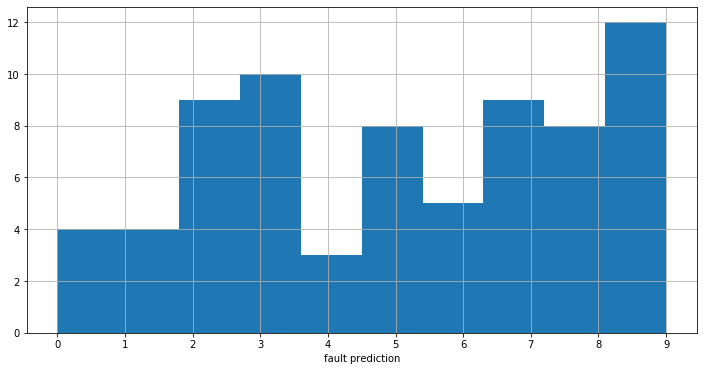

In [125]:
plt.figure(figsize=(12,6))
plt.hist(res['pred'], bins=10)
plt.xlabel('fault prediction')
plt.xticks(range(10))
plt.grid()
plt.show()

In [127]:
ver = res.query('label==9').sample(n=8).index
ver

Int64Index([1901, 2293, 1709, 4078, 2129, 6560, 1247, 2414], dtype='int64')

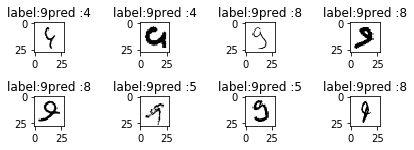

<Figure size 1080x576 with 0 Axes>

In [137]:
cnt = 0
for n in ver :
    cnt += 1
    plt.subplot(4, 4, cnt)
    plt.imshow(xTest[n].reshape(28,28), cmap='Greys')
    t = 'label:'+str(res['label'][n]) + 'pred :'+str(res['pred'][n])
    plt.title(t)


plt.tight_layout()
plt.figure(figsize=(15,8))
plt.show()

# 이터레이터 / 제너레이터

In [144]:
dir([1,2,3])

it = [1,2,3].__iter__()
it.__next__()
it.__next__()

2

In [146]:
range(3).__iter__()

In [147]:
for i in range(3) :
    print(i)
    
# 1. range에서 __iter__로 이터레이터 객체 생성
# 2. 반복할 때마다 이터레이터에서 __next__를 호출해서 숫자를 꺼내고 i에 저장

0
1
2


In [166]:
class MyCounter :
    def __getitem__(self, index) :
        if index < self.stop :
            return index
        else :
            raise StopIteration
    
    def __init__(self, stop):
        self.current = 0
        self.stop = stop
    
#     def __iter__(self) :
#         return self
    
#     def __next__(self) :
#         if self.current < self.stop :
#             r = self.current
#             self.current += 1
#             return r
#         else :
#             raise StopIteration

# a,b,c = MyCounter(3)
# print(a,b,c)

In [169]:
for i in MyCounter(3) :
    print(i)

0
1
2


In [188]:
# 파이썬 iter함수 : 객체의 __iter__메서드를 호출
# 파이썬 next함수 : 객체의 __next__메서드를 호출
it = iter(range(3))


In [189]:
import random

In [228]:
it = iter(lambda : random.randint(0,5), 2)
next(it)
next(it)
next(it)
next(it)
next(it)


0

In [234]:
# 제너레이터 : 이터레이터를 생성하는 함수
# 함수 내부에 yield 키워드를 주면 이터레이터 생성됨
def myGen() :
    yield 0
    yield 1
    yield 2

In [235]:
for i in myGen():
    print(i)

0
1
2


In [236]:
mg = myGen()
dir(mg)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

# 이미지 제너레이터
1. 이미지 제너레이터 클래스 객체 생성
2. flow_from_directory()호출 -> 제너레이터 생성

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

In [273]:
from keras.preprocessing.image import ImageDataGenerator

In [274]:
trainDataGen = ImageDataGenerator(rescale=1./255)

In [275]:
trainGenerator = trainDataGen.flow_from_directory('./do/train', target_size=(24,24), batch_size=3, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [276]:
testDataGen = ImageDataGenerator(rescale=1./255)
testGenerator = testDataGen.flow_from_directory('./do/test', target_size=(24,24), batch_size=3, class_mode='categorical')

Found 15 images belonging to 3 classes.


In [277]:
model = Sequential()
# 입력이미지 크기 : 24*24 / 채널 : 3 / 필터 : 3*3 / 필터개수 : 32 / 활성화함수 : relu
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
#                       / 채널 : 3 / 필터 : 3*3 / 필터개수 : 64 / 활성화함수 : relu
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# maxpool : 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
# faltten() -> Dense(128개 뉴련) -> Dense(softmax)
model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [278]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               819328    
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_______________________________________________

In [279]:
# 모델 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [281]:
# 모델 학습
# fit_generator() : 제너레이터로 생성된 데이터를 학습하는 함수
model.fit_generator(trainGenerator, steps_per_epoch=15, epochs=50, validation_data=testGenerator, validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 37ms/step - loss: 1.1877 - accuracy: 0.5333 - val_loss: 0.7561 - val_accuracy: 0.6667
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.4007 - accuracy: 0.8889 - val_loss: 0.2524 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 22ms/step - loss: 0.0701 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 6.8543e-04 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2368 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 19ms/step - loss: 5.9890e-04 - accuracy: 1.0000 - val_loss: 2.0056e-04 - val_accuracy: 0.9333
E

In [282]:
scores = model.evaluate_generator(testGenerator, steps=5)
print(scores)

[0.0005711587728001177, 0.9333333373069763]


In [284]:
res = model.predict_generator(testGenerator, steps=5)
print(res)

[[9.9999952e-01 9.5664291e-08 3.3475374e-07]
 [5.5615932e-01 3.2994524e-01 1.1389544e-01]
 [2.1254884e-07 9.9999976e-01 3.7322945e-09]
 [1.0906176e-06 1.0015899e-03 9.9899727e-01]
 [3.5214805e-07 9.9999964e-01 4.5085002e-10]
 [2.2040787e-08 1.0000000e+00 1.4579982e-10]
 [6.3162496e-08 3.9516524e-07 9.9999952e-01]
 [9.9999893e-01 6.5078177e-07 4.5049237e-07]
 [9.9996555e-01 5.9961485e-06 2.8507220e-05]
 [9.9999452e-01 7.0534747e-07 4.7367867e-06]
 [4.2660718e-05 1.4012908e-02 9.8594439e-01]
 [1.7617653e-08 1.0000000e+00 1.6416266e-11]
 [2.9621809e-08 6.9939845e-09 1.0000000e+00]
 [3.5197683e-09 1.8079569e-07 9.9999976e-01]
 [9.9828821e-01 1.5191214e-06 1.7102305e-03]]


In [ ]:
'''
ImageDataGenerator()의 속성
    rotation_range : 회전, 90(0~90도 사이 랜덤)
    width_shift_range = 0~1사이의 비율, 0.1(이미지 너비의 10% 좌/우 이동)
    height_shift_range = 0~1사이의 비율, 0.1(이미지 너비의 10% 상/하 이동)
    shear_range : 변형, 라디안, 0.5(반시계빵향 밀어서 변형)
    zoom_range() : 축소, 0.3(0.7 ~ 1.3 사이의 크기로 )
    horizontal_flip : 수평축으로 뒤집기
    vertical_flip : 수직축으로 뒤집기
'''

In [286]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [287]:
augGen = ImageDataGenerator(rescale=1./255,
                  rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.5,
                  zoom_range=[0.8,2.0],
                  horizontal_flip=True,
                  vertical_flip=True,
                  fill_mode='nearest')

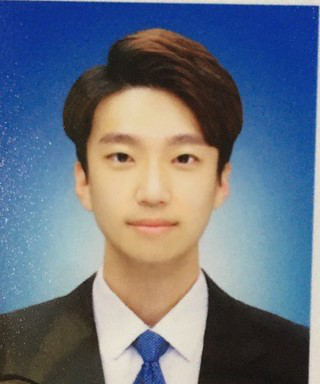

In [307]:
# img = load_img('do/train/triangle/triangle001.png')
img = load_img('moon.png')
img

In [308]:
x = img_to_array(img)
x.shape  # 24, 24, 3

x = x.reshape((1,)+x.shape)
x.shape

(1, 384, 320, 3)

In [310]:
i = 0

for batch in augGen.flow(x, batch_size=1, save_to_dir='store', save_prefix='tri', save_format='png') :
    i += 1
    if i > 50 :
        break

In [360]:
# 데이터 읽기
data = np.loadtxt('data/wine.data', delimiter=',')
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [361]:
# 데이터 나누기
y = data[:,[0]]
x = data[:,1:]

In [363]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x.shape

(178, 13)

In [364]:
# 원핫인코딩
y = np_utils.to_categorical(y,4, dtype='float32')  # 종류는 3개인데 이상하게 4개로 변화이 됨
y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [378]:
# 첫번째 열을 날림
y = np.array([i[1:] for i in y])

In [409]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=777)

In [423]:
model = Sequential()

model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping적용
es = EarlyStopping(monitor='val_loss', patience=10)

model.fit(xTrain, yTrain, epochs=500, batch_size=64, validation_data=(xTest, yTest), callbacks=[es])

model.evaluate(xTest, yTest)

Train on 124 samples, validate on 54 samples
Epoch 1/500
124/124 [==============================] - 1s 4ms/step - loss: 1.0647 - accuracy: 0.4355 - val_loss: 1.0949 - val_accuracy: 0.3148
Epoch 2/500
124/124 [==============================] - 0s 73us/step - loss: 1.0569 - accuracy: 0.4355 - val_loss: 1.0906 - val_accuracy: 0.3148
Epoch 3/500
124/124 [==============================] - 0s 72us/step - loss: 1.0491 - accuracy: 0.4355 - val_loss: 1.0856 - val_accuracy: 0.3148
Epoch 4/500
124/124 [==============================] - 0s 73us/step - loss: 1.0413 - accuracy: 0.4355 - val_loss: 1.0800 - val_accuracy: 0.3148
Epoch 5/500
124/124 [==============================] - 0s 81us/step - loss: 1.0330 - accuracy: 0.4355 - val_loss: 1.0742 - val_accuracy: 0.2963
Epoch 6/500
124/124 [==============================] - 0s 73us/step - loss: 1.0250 - accuracy: 0.4355 - val_loss: 1.0689 - val_accuracy: 0.2963
Epoch 7/500
124/124 [==============================] - 0s 81us/step - loss: 1.0167 - accurac

Epoch 57/500
124/124 [==============================] - 0s 73us/step - loss: 0.6281 - accuracy: 0.8952 - val_loss: 0.7333 - val_accuracy: 0.7963
Epoch 58/500
124/124 [==============================] - 0s 81us/step - loss: 0.6190 - accuracy: 0.9032 - val_loss: 0.7240 - val_accuracy: 0.7963
Epoch 59/500
124/124 [==============================] - 0s 81us/step - loss: 0.6096 - accuracy: 0.9113 - val_loss: 0.7147 - val_accuracy: 0.8148
Epoch 60/500
124/124 [==============================] - 0s 73us/step - loss: 0.6000 - accuracy: 0.9113 - val_loss: 0.7048 - val_accuracy: 0.8333
Epoch 61/500
124/124 [==============================] - 0s 81us/step - loss: 0.5907 - accuracy: 0.9194 - val_loss: 0.6949 - val_accuracy: 0.8519
Epoch 62/500
124/124 [==============================] - 0s 81us/step - loss: 0.5808 - accuracy: 0.9274 - val_loss: 0.6836 - val_accuracy: 0.8704
Epoch 63/500
124/124 [==============================] - 0s 73us/step - loss: 0.5706 - accuracy: 0.9194 - val_loss: 0.6727 - val_ac

124/124 [==============================] - 0s 89us/step - loss: 0.1922 - accuracy: 0.9919 - val_loss: 0.2544 - val_accuracy: 0.9630
Epoch 114/500
124/124 [==============================] - 0s 73us/step - loss: 0.1871 - accuracy: 0.9919 - val_loss: 0.2492 - val_accuracy: 0.9630
Epoch 115/500
124/124 [==============================] - 0s 89us/step - loss: 0.1823 - accuracy: 0.9919 - val_loss: 0.2439 - val_accuracy: 0.9630
Epoch 116/500
124/124 [==============================] - 0s 72us/step - loss: 0.1777 - accuracy: 0.9919 - val_loss: 0.2384 - val_accuracy: 0.9630
Epoch 117/500
124/124 [==============================] - 0s 73us/step - loss: 0.1731 - accuracy: 0.9919 - val_loss: 0.2333 - val_accuracy: 0.9630
Epoch 118/500
124/124 [==============================] - 0s 89us/step - loss: 0.1687 - accuracy: 0.9919 - val_loss: 0.2284 - val_accuracy: 0.9630
Epoch 119/500
124/124 [==============================] - 0s 89us/step - loss: 0.1646 - accuracy: 0.9919 - val_loss: 0.2234 - val_accuracy:

124/124 [==============================] - 0s 81us/step - loss: 0.0617 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9630
Epoch 170/500
124/124 [==============================] - 0s 81us/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9630
Epoch 171/500
124/124 [==============================] - 0s 73us/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9630
Epoch 172/500
124/124 [==============================] - 0s 73us/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.1135 - val_accuracy: 0.9630
Epoch 173/500
124/124 [==============================] - 0s 73us/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9630
Epoch 174/500
124/124 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 1.00 - 0s 81us/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9630
Epoch 175/500
124/124 [==============================] - 0s 89us/step - loss: 0.0566 - accuracy:

Epoch 225/500
124/124 [==============================] - 0s 89us/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9630
Epoch 226/500
124/124 [==============================] - 0s 89us/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9630
Epoch 227/500
124/124 [==============================] - 0s 81us/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy: 0.9630
Epoch 228/500
124/124 [==============================] - 0s 73us/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9630
Epoch 229/500
124/124 [==============================] - 0s 73us/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9630
Epoch 230/500
124/124 [==============================] - 0s 73us/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9630
Epoch 231/500
124/124 [==============================] - 0s 81us/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.0855 -

124/124 [==============================] - 0s 81us/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9630
Epoch 282/500
124/124 [==============================] - 0s 89us/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9630
Epoch 283/500
124/124 [==============================] - 0s 72us/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9630
Epoch 284/500
124/124 [==============================] - 0s 73us/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9630
Epoch 285/500
124/124 [==============================] - 0s 89us/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9630
Epoch 286/500
124/124 [==============================] - 0s 81us/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9630
Epoch 287/500
124/124 [==============================] - 0s 73us/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy:

124/124 [==============================] - 0s 81us/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9630
Epoch 337/500
124/124 [==============================] - 0s 89us/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9630
Epoch 338/500
124/124 [==============================] - 0s 81us/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9630
Epoch 339/500
124/124 [==============================] - 0s 81us/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9630
Epoch 340/500
124/124 [==============================] - 0s 81us/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9630
Epoch 341/500
124/124 [==============================] - 0s 81us/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9630
Epoch 342/500
124/124 [==============================] - 0s 81us/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy:

[0.07005384260857547, 0.9629629850387573]

In [432]:
valLoss = model.history.history['val_loss']
testLoss = model.history.history['loss']

valAcc = model.history.history['val_accuracy']
testAcc = model.history.history['accuracy']

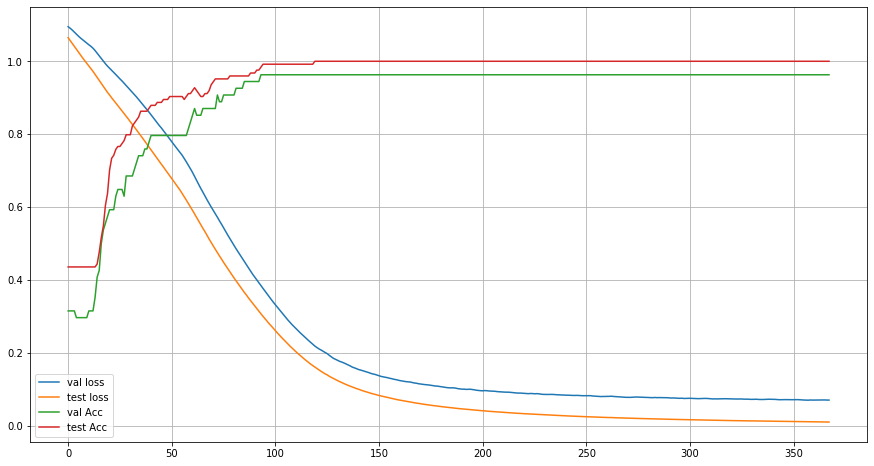

In [433]:
plt.figure(figsize=(15,8))
plt.plot(range(len(valLoss)), valLoss, label='val loss')
plt.plot(range(len(valLoss)), testLoss, label='test loss')

plt.plot(range(len(valAcc)), valAcc, label='val Acc')
plt.plot(range(len(testAcc)), testAcc, label='test Acc')

plt.grid()
plt.legend()

plt.show()